In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from seaborn import color_palette
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [149]:
data = pd.read_csv('SM1_data.csv')

data=data.set_index('Date')
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')

In [150]:
train = data.loc[data.index <'2017-01-01']
test = data.loc[(data.index >= '2017-01-01') & (data.index < '2021-01-01')]


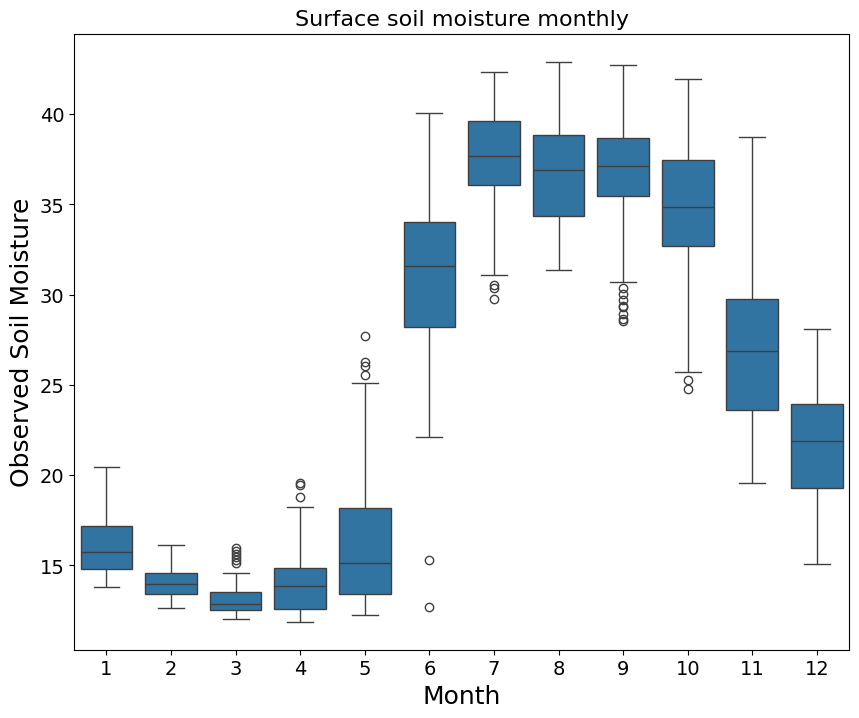

In [151]:
def create_features(data):
    #this will create ts features on time series index
    data=data.copy()
    data['Month']=data.index.month
    data['quarter']=data.index.quarter
    data['dayofyear']=data.index.day_of_year
    data['year']=data.index.year
    data['daysofweek']=data.index.day_of_week
    return data

plt.rc('font', size=14)          
plt.rc('axes', titlesize=16)     
plt.rc('axes', labelsize=18)     
plt.rc('xtick', labelsize=14)    
plt.rc('ytick', labelsize=14)    
plt.rc('legend', fontsize=14)    
plt.rc('figure', titlesize=18)

data=create_features(test)
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=data,x='Month',y='SM10')
plt.ylabel('Observed Soil Moisture')
ax.set_title('Surface soil moisture monthly')
plt.show()

In [152]:


X_train = train[['St10', 'Rain', 'Air_Temperature','ref40']]
Y_train = train[['SM10']]

X_test = test[['St10', 'Rain', 'Air_Temperature','ref40']]
Y_test = test[['SM10']]


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)




Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 178.8251 - mae: 9.0865 - val_loss: 17.5335 - val_mae: 3.2146
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18.9798 - mae: 3.1181 - val_loss: 19.7115 - val_mae: 3.0583
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.5897 - mae: 2.9749 - val_loss: 15.5703 - val_mae: 2.8665
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.0735 - mae: 2.7719 - val_loss: 16.5836 - val_mae: 2.8950
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15.1883 - mae: 2.7256 - val_loss: 15.7768 - val_mae: 2.7694
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 14.8079 - mae: 2.6538 - val_loss: 17.1700 - val_mae: 2.8886
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13.9025 - mae: 2.5743 - val_loss: 15.5514 - val_mae: 2.8723
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.3523 - mae: 2.5935 - val_loss: 14.7648 - val_mae: 2.7472
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━

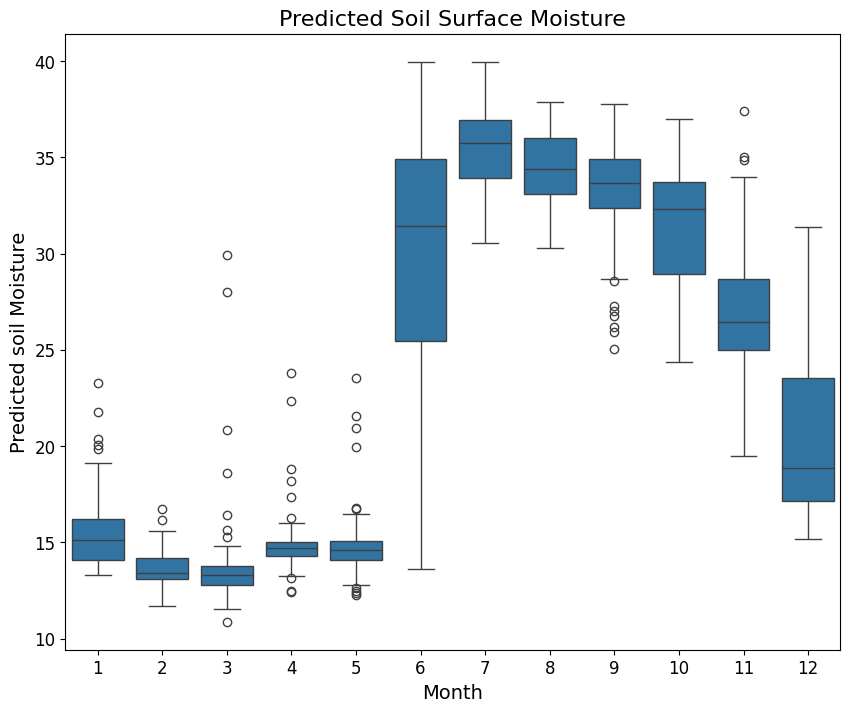

In [153]:
SMP_df = pd.DataFrame(SMP, index=test.index, columns=['SM10']) 
PSM = SMP_df.loc[(SMP_df.index >= '2017-01-01') & (SMP_df.index < '2021-01-01')]
data = create_features(PSM)
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the y tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=18)

fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=data,x='Month',y='SM10')
ax.set_title('Predicted Soil Surface Moisture')
plt.ylabel('Predicted soil Moisture')
plt.show()